### Word2Vec SkipGram Algorithm Implementation¶

#### Import all important libraries

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch.nn.functional as F
CUDA = torch.cuda.is_available()

#### Download the "text8.txt" data, if not available

In [2]:
#%%
#Downloading the data if not available
#!wget -qq https://s3.amazonaws.com/video.udacity-data.com/topher/2018/October/5bbe6499_text8/text8.zip

# Unzip the folder
#with zipfile.ZipFile("text8.zip","r") as zip_ref:
 #   zip_ref.extractall("C:/Users/saifu")

In [30]:
#%%
learning_rate = 0.001
epochs = 30

##### Open the file and read it

In [31]:
#reading the text data from the file
with open('C:/Users/saifu/text8') as f:    #open the content of the file 
    text8 = f.read()         # read it
    print("lenght of original dataset:{}".format(len(text8)) )
print("Some sample texts:" ,text8[:300])     #printing the first 500 characters

lenght of original dataset:100000000
Some sample texts:  anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organiz


In [34]:
#### Take the first 10000 words

In [35]:
text= text8.lower().split()
text= text[0:10000]
text

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

#### converting to unique set

In [36]:
vocab = set(text)  # converting to unique set  ## type(vocab) = set 
vocab

{'regulating',
 'century',
 'inflection',
 'adopted',
 'grubacic',
 'taoism',
 'philosophical',
 'chaos',
 'influencing',
 'collectives',
 'china',
 'grasp',
 'minor',
 'class',
 'mcelroy',
 'unionist',
 'unconnected',
 'small',
 'isaac',
 'spectrum',
 'especially',
 'seattle',
 'meeting',
 'voting',
 'argentina',
 'accepted',
 'spread',
 'importance',
 'neurotypicals',
 'jacques',
 'something',
 'alliance',
 'democracy',
 'caplan',
 'claims',
 'describe',
 'clearinghouse',
 'odds',
 'members',
 'growing',
 'full',
 'neocolonialism',
 'germany',
 'trains',
 'diggers',
 'themes',
 'oppressed',
 'i',
 'exhibits',
 'coherent',
 'shouldn',
 'ashanti',
 'disturbing',
 'term',
 'first',
 'treatment',
 'concepts',
 'speculate',
 'stereotyped',
 'subpage',
 'religious',
 'militias',
 'secular',
 'reader',
 'differently',
 'starhawk',
 'asd',
 'disagreement',
 'ex',
 'countries',
 'structures',
 'anarcho',
 'detailed',
 'chimpanzees',
 'privately',
 'allows',
 'base',
 'results',
 'nechaev',
 '

#### Building word2index dictionary

In [37]:
word2index = {w:i for i,w in enumerate(vocab)}   # giving index to each of the set by making a dictionary""
word2index

{'regulating': 0,
 'century': 1,
 'inflection': 2,
 'adopted': 3,
 'grubacic': 4,
 'taoism': 5,
 'philosophical': 6,
 'chaos': 7,
 'influencing': 8,
 'collectives': 9,
 'china': 10,
 'grasp': 11,
 'minor': 12,
 'class': 13,
 'mcelroy': 14,
 'unionist': 15,
 'unconnected': 16,
 'small': 17,
 'isaac': 18,
 'spectrum': 19,
 'especially': 20,
 'seattle': 21,
 'meeting': 22,
 'voting': 23,
 'argentina': 24,
 'accepted': 25,
 'spread': 26,
 'importance': 27,
 'neurotypicals': 28,
 'jacques': 29,
 'something': 30,
 'alliance': 31,
 'democracy': 32,
 'caplan': 33,
 'claims': 34,
 'describe': 35,
 'clearinghouse': 36,
 'odds': 37,
 'members': 38,
 'growing': 39,
 'full': 40,
 'neocolonialism': 41,
 'germany': 42,
 'trains': 43,
 'diggers': 44,
 'themes': 45,
 'oppressed': 46,
 'i': 47,
 'exhibits': 48,
 'coherent': 49,
 'shouldn': 50,
 'ashanti': 51,
 'disturbing': 52,
 'term': 53,
 'first': 54,
 'treatment': 55,
 'concepts': 56,
 'speculate': 57,
 'stereotyped': 58,
 'subpage': 59,
 'religious

#### Building index2word dictionary

In [38]:
index2word = {i:w for i,w in enumerate(vocab)}
index2word

{0: 'regulating',
 1: 'century',
 2: 'inflection',
 3: 'adopted',
 4: 'grubacic',
 5: 'taoism',
 6: 'philosophical',
 7: 'chaos',
 8: 'influencing',
 9: 'collectives',
 10: 'china',
 11: 'grasp',
 12: 'minor',
 13: 'class',
 14: 'mcelroy',
 15: 'unionist',
 16: 'unconnected',
 17: 'small',
 18: 'isaac',
 19: 'spectrum',
 20: 'especially',
 21: 'seattle',
 22: 'meeting',
 23: 'voting',
 24: 'argentina',
 25: 'accepted',
 26: 'spread',
 27: 'importance',
 28: 'neurotypicals',
 29: 'jacques',
 30: 'something',
 31: 'alliance',
 32: 'democracy',
 33: 'caplan',
 34: 'claims',
 35: 'describe',
 36: 'clearinghouse',
 37: 'odds',
 38: 'members',
 39: 'growing',
 40: 'full',
 41: 'neocolonialism',
 42: 'germany',
 43: 'trains',
 44: 'diggers',
 45: 'themes',
 46: 'oppressed',
 47: 'i',
 48: 'exhibits',
 49: 'coherent',
 50: 'shouldn',
 51: 'ashanti',
 52: 'disturbing',
 53: 'term',
 54: 'first',
 55: 'treatment',
 56: 'concepts',
 57: 'speculate',
 58: 'stereotyped',
 59: 'subpage',
 60: 'relig

In [39]:
class CBOW(nn.Module):
    
    def __init__(self, vocab_size, embedding_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        
        if CUDA:
            self.embedding = self.embedding.cuda()
        self.hidden = nn.Linear(embedding_size, vocab_size)
        # self.op = F.LogSoftmax()
        
    def forward(self, X):
        embeds = self.embedding(X.long())
        mean_embed = torch.mean(embeds, dim=0).view(1,-1)
        outs = self.hidden(mean_embed)
        log_probs = F.log_softmax(outs) 
        return log_probs

In [40]:
def text_to_train(text, context_window):
    '''
    parameters:
    text = list type input
    context_window= int
    Convert text to data for training cbow model
    '''
    
    data = []
    
    for i in range(context_window, len(text) - context_window):
        context = [
            text[i+e] for e in range(-context_window, context_window+1) if i+e != i
        ]
        target = text[i]
        
        data.append((context, target))
    return data

data = text_to_train(text, 2)

print("data samples :", data[:10])

data samples : [(['anarchism', 'originated', 'a', 'term'], 'as'), (['originated', 'as', 'term', 'of'], 'a'), (['as', 'a', 'of', 'abuse'], 'term'), (['a', 'term', 'abuse', 'first'], 'of'), (['term', 'of', 'first', 'used'], 'abuse'), (['of', 'abuse', 'used', 'against'], 'first'), (['abuse', 'first', 'against', 'early'], 'used'), (['first', 'used', 'early', 'working'], 'against'), (['used', 'against', 'working', 'class'], 'early'), (['against', 'early', 'class', 'radicals'], 'working')]


In [41]:
def words_to_tensor(words: list, w2i: dict, dtype=torch.FloatTensor):
    """ 
    converts a list of words in to correspondinf tensor of indices
    resturns a tensor of word indices
    """
    tensor =  dtype([ w2i[word] for word in words])
    
    if CUDA:
        tensor = tensor.cuda()
    return Variable(tensor)

def get_prediction(context, model):
    """
    

    Parameters
    ----------
    context : list
        DESCRIPTION. context words a list  e.g. ['as', 'the', 'strange', 'beings']
    model : <class '__main__.CBOW'>
        DESCRIPTION.

    Returns
    -------
    TYPE
        DESCRIPTION.

    """
    model.eval()
    context_tensors = words_to_tensor(context, word2index)
    prediction = model(context_tensors)  #  prediction.shape = torch.Size([1, 171])
    # _, index = torch.max(prediction, 1)
    # return index2word[index.data[0]]
    _ , index = torch.max(prediction, 1)  # we are only interested with the index of the maximum probable word
    return index2word[index.item()]

def check_accuracy(model):
    correct = 0
    for context, target in data:
        prediction = get_prediction(context, model)
        if prediction == target:
            correct += 1
    accuracy= (correct/len(data))*100
    return accuracy

In [42]:
model = CBOW(len(vocab), 100)
model


CBOW(
  (embedding): Embedding(2520, 100)
  (hidden): Linear(in_features=100, out_features=2520, bias=True)
)

#### Start training

In [43]:
## Training
model = CBOW(len(vocab), 100)

if CUDA:
    model = model.cuda()

loss_func = torch.nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
losses = []
accuracy_list=[]

for epoch in range(epochs):
    total_loss = 0
    
    for context, target in data:  # len(context)=4,  len(target)=1
        
        # context= ['anarchism', 'originated', 'a', 'term'] ,  target= tensor([157]
        
        ids = words_to_tensor(context,word2index)   # e.g. ids=tensor([ 58.,44.,163.,121.],   ids.shape= torch.Size([4])
        target = words_to_tensor([target], word2index, dtype=torch.LongTensor)        # target.shape = torch.Size([1])
        model.zero_grad()
        output = model(ids)   #  output.shape torch.Size([1,171],  len(vocab)=171 )        
        loss = loss_func(output, target)   # output.shape= torch.Size([1, 171]), target.shape   torch.Size([1])
        loss.backward()
        optimizer.step()        
        total_loss += loss  
        
    losses.append(total_loss)    
    print("Epoch {} training Loss: {:.2f} at  " .format( epoch, total_loss.item()))     
    if epoch% 2 == 0:
        accuracy = check_accuracy(model)
        accuracy_list.append(accuracy)
        print("\n   Accuracy at epoch {} is {:.2f}% \n ".format(epoch, accuracy))


C:\Users\saifu\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Epoch 0 training Loss: 77832.90 at  

   Accuracy at epoch 0 is 4.17% 
 
Epoch 1 training Loss: 75834.27 at  
Epoch 2 training Loss: 74008.01 at  

   Accuracy at epoch 2 is 7.34% 
 
Epoch 3 training Loss: 72505.21 at  
Epoch 4 training Loss: 71231.27 at  

   Accuracy at epoch 4 is 8.02% 
 
Epoch 5 training Loss: 70108.49 at  
Epoch 6 training Loss: 69122.09 at  

   Accuracy at epoch 6 is 8.59% 
 
Epoch 7 training Loss: 68248.16 at  
Epoch 8 training Loss: 67459.51 at  

   Accuracy at epoch 8 is 8.90% 
 
Epoch 9 training Loss: 66735.91 at  
Epoch 10 training Loss: 66064.08 at  

   Accuracy at epoch 10 is 9.29% 
 
Epoch 11 training Loss: 65436.72 at  
Epoch 12 training Loss: 64847.95 at  

   Accuracy at epoch 12 is 9.47% 
 
Epoch 13 training Loss: 64294.00 at  
Epoch 14 training Loss: 63770.98 at  

   Accuracy at epoch 14 is 9.64% 
 
Epoch 15 training Loss: 63275.59 at  
Epoch 16 training Loss: 62804.45 at  

   Accuracy at epoch 16 is 9.91% 
 
Epoch 17 training Loss: 62355.83 at 

#### Plot the loss

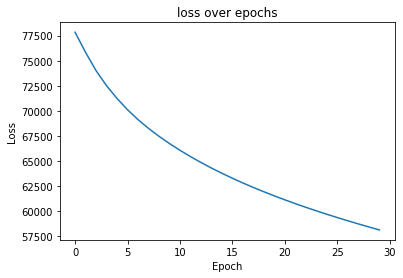

In [44]:
#  Plot the curves
plt.figure()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('loss over epochs')
plt.savefig('loss_over_epochs_cbow.png')
plt.show()


In [45]:
#### Plot the accuracy

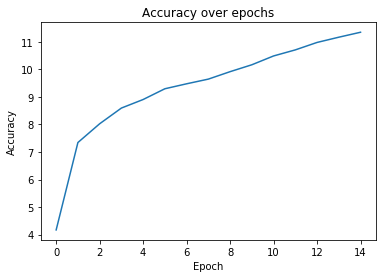

In [46]:
plt.figure()
plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Accuracy over epochs')
plt.savefig('Accuracy_over_epochs_cbow.png')
plt.show()

In [47]:
# measuring the Euclidean distance
C = 3  # window size
target = 'most'
target in vocab    

def word_euclidean(model, target, vocab_set, vocab2id):
    
    model.to('cpu')
    target_embed = model.embedding(torch.LongTensor([[vocab2id[target]]]))
    target_similar = dict()

    for vocab in vocab_set:
        if vocab != target:
            vocab_embed = model.embedding(torch.LongTensor([[vocab2id[vocab]]]))
            similarity = torch.dist(target_embed, vocab_embed, 2).item()
            if len(target_similar) < 10:
                target_similar[round(similarity, 6)] = vocab
            elif min(target_similar.keys()) > similarity:
                del target_similar[min(target_similar.keys())]
                target_similar[round(similarity, 6)] = vocab
    
    return sorted(target_similar.items(), reverse=False)


In [48]:
# measuring the cosine similarity
def word_cosine(model, target, vocab_set, vocab2id):
    
    model.to('cpu')
    target_embed = model.embedding(torch.LongTensor([[vocab2id[target]]]))
    target_similar = dict()

    for vocab in vocab_set:
        if vocab != target:
            vocab_embed = model.embedding(torch.LongTensor([vocab2id[vocab]]))
            similarity = F.cosine_similarity(target_embed.squeeze(dim=0), vocab_embed).item()
            if len(target_similar) < 10:
                target_similar[round(similarity, 6)] = vocab
            elif min(target_similar.keys()) < similarity:
                del target_similar[min(target_similar.keys())]
                target_similar[round(similarity, 6)] = vocab
    
    return sorted(target_similar.items(), reverse=False)    

In [49]:
euc= word_euclidean(model,target, vocab, word2index)
cos = word_cosine(model,target, vocab, word2index)

#### Euclidean Distance

In [50]:
    
print('\nEuclidean Distance')
for i, (score, vocab) in enumerate(euc):
    print('Top {} word : {}    score : {}'.format(i+1, vocab, score))


Euclidean Distance
Top 1 word : manual    score : 11.215844
Top 2 word : adopted    score : 12.718143
Top 3 word : century    score : 13.050874
Top 4 word : collectives    score : 13.293568
Top 5 word : influencing    score : 13.337139
Top 6 word : chaos    score : 13.774772
Top 7 word : regulating    score : 14.319456
Top 8 word : taoism    score : 14.429789
Top 9 word : grubacic    score : 15.055115
Top 10 word : philosophical    score : 15.451818


#### Cosine Similarity

In [51]:
print('\nCosine Similarity') 
for i, (score, vocab) in enumerate(cos):
    print('Top {} word : {}    score : {}'.format(i+1, vocab, score)) 


Cosine Similarity
Top 1 word : essays    score : 0.252765
Top 2 word : child    score : 0.257122
Top 3 word : manual    score : 0.267931
Top 4 word : exponent    score : 0.267947
Top 5 word : objections    score : 0.271724
Top 6 word : lack    score : 0.272141
Top 7 word : websites    score : 0.272798
Top 8 word : insurrectionary    score : 0.273735
Top 9 word : detailed    score : 0.279119
Top 10 word : occur    score : 0.291141


#### Visualize the words

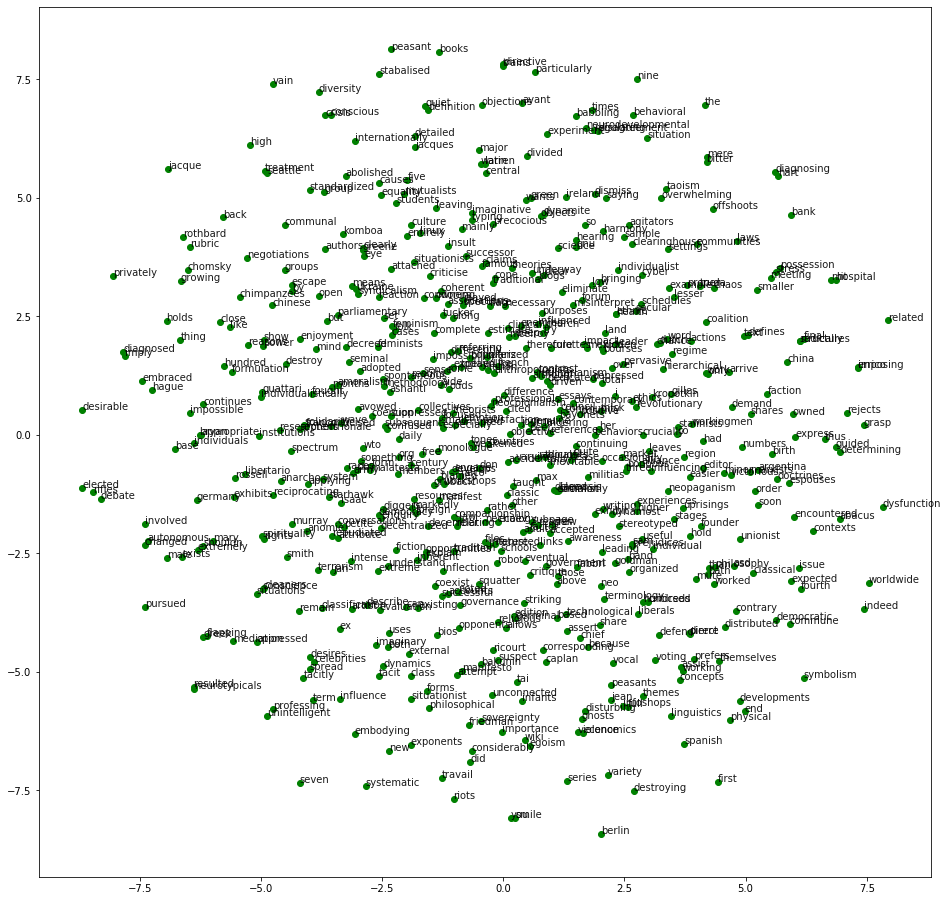

In [52]:
# TSNE
embeddings = model.embedding.weight.to('cpu').data.numpy()
viz_words = 600
tsne = TSNE()
#visualize first 600 words 
embed_tsne = tsne.fit_transform(embeddings[: viz_words, :])
fig, ax = plt.subplots(figsize=(16, 16))

for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='g')
    plt.annotate(index2word[idx], (embed_tsne[idx,0], embed_tsne[idx, 1]), alpha=0.9)